In [ ]:
from google.colab import drive
drive.mount('./gdrive')

In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks')

In [ ]:
!pip install quantile-forest
!pip install dill

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from joblib import Parallel, delayed
import sys
sys.path.append('..')
sns.set_style('whitegrid')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
from src import tqf, gendata
from src.gendata import sig
from src.qmem import energy_distance, quantile

In [6]:
p = 2
X, Y = gendata.create_r(size=20000, seed=465, num_features=p)
X.shape, Y.shape

((20000, 2), (20000, 2))

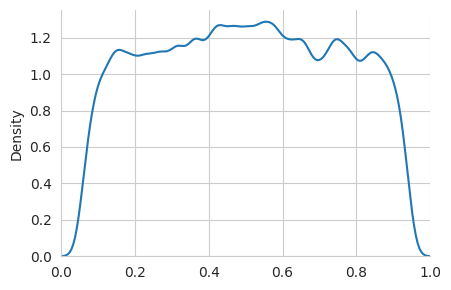

In [7]:
sns.displot(sig(X), kind='kde', height=3, aspect=1.5, bw_adjust=0.5)
plt.xlim(0, 1)
plt.show()

In [8]:
def a2x(a: float):
    return np.log(a / (1. - a)) / 1.5

# Comparison of n_augment

In [9]:
total_res = []

n_augment = 1

In [10]:
%%time
NN = 2000
res_tqf = []

for (a, x) in [(a, a2x(a)) for a in [0.1, 0.2, 0.3, 0.4, 0.5]]:

    out = []

    for z in range(3):

        X, Y = gendata.create_r(size=20000, seed=z, num_features=p)
        try:
            del model
            import gc
            gc.collect()
        except:
            pass
        model = tqf.TQF()
        N_AUGMENT = 1
        model.fit(X=X, Y=Y, seed=z, n_augment=N_AUGMENT, n_jobs=5, T_rff=5, n_rot=10,
                  qrf_params={'n_estimators': 50, 'min_samples_leaf': 20 * N_AUGMENT})

        for j in range(3):
            print((z, j), end=' ')
            w_opt, points = model.predict(seed=j + 100 * z, x=np.array([x] * p), verbose=False,
                                          n_qs=30, n_directions=30, n_ensemble=20,
                                          n_jobs=10, patience=3)
            Y_true = gendata.create_r_slice(a=a, seed=j + 100 * z, size=NN)
            out.append(energy_distance(X=Y_true, Y=points, weight_Y=w_opt))

    res_tqf.append([a, np.mean(out), np.std(out)])

res_tqf = np.array(res_tqf)

(0, 0) (0, 1) (0, 2) (1, 0) (1, 1) (1, 2) (2, 0) (2, 1) (2, 2) (0, 0) (0, 1) (0, 2) (1, 0) (1, 1) (1, 2) (2, 0) (2, 1) (2, 2) (0, 0) (0, 1) (0, 2) (1, 0) (1, 1) (1, 2) (2, 0) (2, 1) (2, 2) (0, 0) (0, 1) (0, 2) (1, 0) (1, 1) (1, 2) (2, 0) (2, 1) (2, 2) (0, 0) (0, 1) (0, 2) (1, 0) (1, 1) (1, 2) (2, 0) (2, 1) (2, 2) CPU times: user 28min 40s, sys: 4.85 s, total: 28min 45s
Wall time: 26min 22s


In [11]:
total_res += [[N_AUGMENT, res_tqf]]
print(res_tqf)

[[0.1        0.04977508 0.01323527]
 [0.2        0.04594636 0.00675681]
 [0.3        0.06016253 0.0158116 ]
 [0.4        0.05474836 0.0097276 ]
 [0.5        0.05869069 0.01594935]]


n_augment = 5

In [12]:
%%time
NN = 2000
res_tqf = []

for (a, x) in [(a, a2x(a)) for a in [0.1, 0.2, 0.3, 0.4, 0.5]]:

    out = []

    for z in range(3):

        X, Y = gendata.create_r(size=20000, seed=z, num_features=p)
        try:
            del model
            import gc
            gc.collect()
        except:
            pass
        model = tqf.TQF()
        N_AUGMENT = 5
        model.fit(X=X, Y=Y, seed=z, n_augment=N_AUGMENT, n_jobs=5, T_rff=5, n_rot=10,
                  qrf_params={'n_estimators': 50, 'min_samples_leaf': 20 * N_AUGMENT})

        for j in range(3):
            print((z, j), end=' ')
            w_opt, points = model.predict(seed=j + 100 * z, x=np.array([x] * p), verbose=False,
                                          n_qs=30, n_directions=30, n_ensemble=20,
                                          n_jobs=4, patience=3)
            Y_true = gendata.create_r_slice(a=a, seed=j + 100 * z, size=NN)
            out.append(energy_distance(X=Y_true, Y=points, weight_Y=w_opt))

    res_tqf.append([a, np.mean(out), np.std(out)])

res_tqf = np.array(res_tqf)

(0, 0) (0, 1) (0, 2) (1, 0) (1, 1) (1, 2) (2, 0) (2, 1) (2, 2) (0, 0) (0, 1) (0, 2) (1, 0) (1, 1) (1, 2) (2, 0) (2, 1) (2, 2) (0, 0) (0, 1) (0, 2) (1, 0) (1, 1) (1, 2) (2, 0) (2, 1) (2, 2) (0, 0) (0, 1) (0, 2) (1, 0) (1, 1) (1, 2) (2, 0) (2, 1) (2, 2) (0, 0) (0, 1) (0, 2) (1, 0) (1, 1) (1, 2) (2, 0) (2, 1) (2, 2) CPU times: user 56min 58s, sys: 16.6 s, total: 57min 14s
Wall time: 34min 35s


In [13]:
total_res += [[N_AUGMENT, res_tqf]]
print(res_tqf)

[[0.1        0.0464407  0.02234304]
 [0.2        0.03504165 0.00569569]
 [0.3        0.04295593 0.01021113]
 [0.4        0.04517705 0.00785464]
 [0.5        0.0531539  0.01558087]]


n_augment = 10

In [ ]:
%%time
NN = 2000
res_tqf = []

for (a, x) in [(a, a2x(a)) for a in [0.1, 0.2, 0.3, 0.4, 0.5]]:

    out = []

    for z in range(3):

        X, Y = gendata.create_r(size=20000, seed=z, num_features=p)
        try:
            del model
            import gc
            gc.collect()
        except:
            pass
        model = tqf.TQF()
        N_AUGMENT = 10
        model.fit(X=X, Y=Y, seed=z, n_augment=N_AUGMENT, n_jobs=5, T_rff=5, n_rot=10,
                  qrf_params={'n_estimators': 50, 'min_samples_leaf': 20 * N_AUGMENT})

        for j in range(3):
            print((z, j), end=' ')
            w_opt, points = model.predict(seed=j + 100 * z, x=np.array([x] * p), verbose=False,
                                          n_qs=30, n_directions=30, n_ensemble=20,
                                          n_jobs=4, patience=3)
            Y_true = gendata.create_r_slice(a=a, seed=j + 100 * z, size=NN)
            out.append(energy_distance(X=Y_true, Y=points, weight_Y=w_opt))

    res_tqf.append([a, np.mean(out), np.std(out)])

res_tqf = np.array(res_tqf)

(0, 0) (0, 1) (0, 2) (1, 0) (1, 1) (2, 0) (2, 1) (2, 2) (0, 0) (0, 1) (0, 2) (1, 0) (1, 1) (1, 2) (2, 0) (2, 1) (2, 2) (0, 0) (0, 1) (0, 2) (1, 0) (1, 1) (1, 2) (2, 0) (2, 1) (2, 2) (0, 0) (0, 1) (0, 2) (1, 0) (1, 1) (1, 2) (2, 0) (2, 1) (2, 2) (0, 0) (0, 1) (0, 2) (1, 0) (1, 1) (1, 2) (2, 0) (2, 1) (2, 2) CPU times: user 1h 45min 18s, sys: 30.4 s, total: 1h 45min 48s
Wall time: 45min 20s


In [ ]:
total_res += [[N_AUGMENT, res_tqf]]
print(res_tqf)

[[0.1        0.03736309 0.01300261]
 [0.2        0.03764072 0.00637859]
 [0.3        0.04259685 0.0070132 ]
 [0.4        0.04518533 0.00690725]
 [0.5        0.04964116 0.01726216]]


n_augment = 20

In [ ]:
%%time
NN = 2000
res_tqf = []

for (a, x) in [(a, a2x(a)) for a in [0.1, 0.2, 0.3, 0.4, 0.5]]:

    out = []

    for z in range(3):

        X, Y = gendata.create_r(size=20000, seed=z, num_features=p)
        try:
            del model
            import gc
            gc.collect()
        except:
            pass
        model = tqf.TQF()
        N_AUGMENT = 20
        model.fit(X=X, Y=Y, seed=z, n_augment=N_AUGMENT, n_jobs=5, T_rff=5, n_rot=10,
                  qrf_params={'n_estimators': 50, 'min_samples_leaf': 20 * N_AUGMENT})

        for j in range(3):
            print((z, j), end=' ')
            w_opt, points = model.predict(seed=j + 100 * z, x=np.array([x] * p), verbose=False,
                                          n_qs=30, n_directions=30, n_ensemble=20,
                                          n_jobs=10, patience=3)
            Y_true = gendata.create_r_slice(a=a, seed=j + 100 * z, size=NN)
            out.append(energy_distance(X=Y_true, Y=points, weight_Y=w_opt))

    res_tqf.append([a, np.mean(out), np.std(out)])

res_tqf = np.array(res_tqf)

(0, 0) (0, 1) (0, 2) (1, 0) (1, 1) (1, 2) (2, 0) (2, 1) (2, 2) (0, 0) (2, 0) (2, 1) (2, 2) (0, 0) (0, 1) (0, 2) (1, 0) (1, 1) (1, 2) (2, 0) (2, 1) (2, 2) CPU times: user 3h 30min 32s, sys: 1min 11s, total: 3h 31min 44s
Wall time: 1h 4min 8s


In [ ]:
total_res += [[N_AUGMENT, res_tqf]]
print(res_tqf)

[[0.1        0.0533772  0.02568609]
 [0.2        0.03573023 0.00526202]
 [0.3        0.04464944 0.01439055]
 [0.4        0.04145335 0.00709686]
 [0.5        0.05050281 0.0168019 ]]


In [19]:
total_res

[[1,
  array([[0.1       , 0.04977508, 0.01323527],
         [0.2       , 0.04594636, 0.00675681],
         [0.3       , 0.06016253, 0.0158116 ],
         [0.4       , 0.05474836, 0.0097276 ],
         [0.5       , 0.05869069, 0.01594935]])],
 [5,
  array([[0.1       , 0.0464407 , 0.02234304],
         [0.2       , 0.03504165, 0.00569569],
         [0.3       , 0.04295593, 0.01021113],
         [0.4       , 0.04517705, 0.00785464],
         [0.5       , 0.0531539 , 0.01558087]])],
 [10,
  array([[0.1       , 0.03736309, 0.01300261],
         [0.2       , 0.03764072, 0.00637859],
         [0.3       , 0.04259685, 0.0070132 ],
         [0.4       , 0.04518533, 0.00690725],
         [0.5       , 0.04964116, 0.01726216]])],
 [20,
  array([[0.1       , 0.0533772 , 0.02568609],
         [0.2       , 0.03573023, 0.00526202],
         [0.3       , 0.04464944, 0.01439055],
         [0.4       , 0.04145335, 0.00709686],
         [0.5       , 0.05050281, 0.0168019 ]])]]